In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../Data/housing.csv')

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

x = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
train_data = x_train.join(y_train) 

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

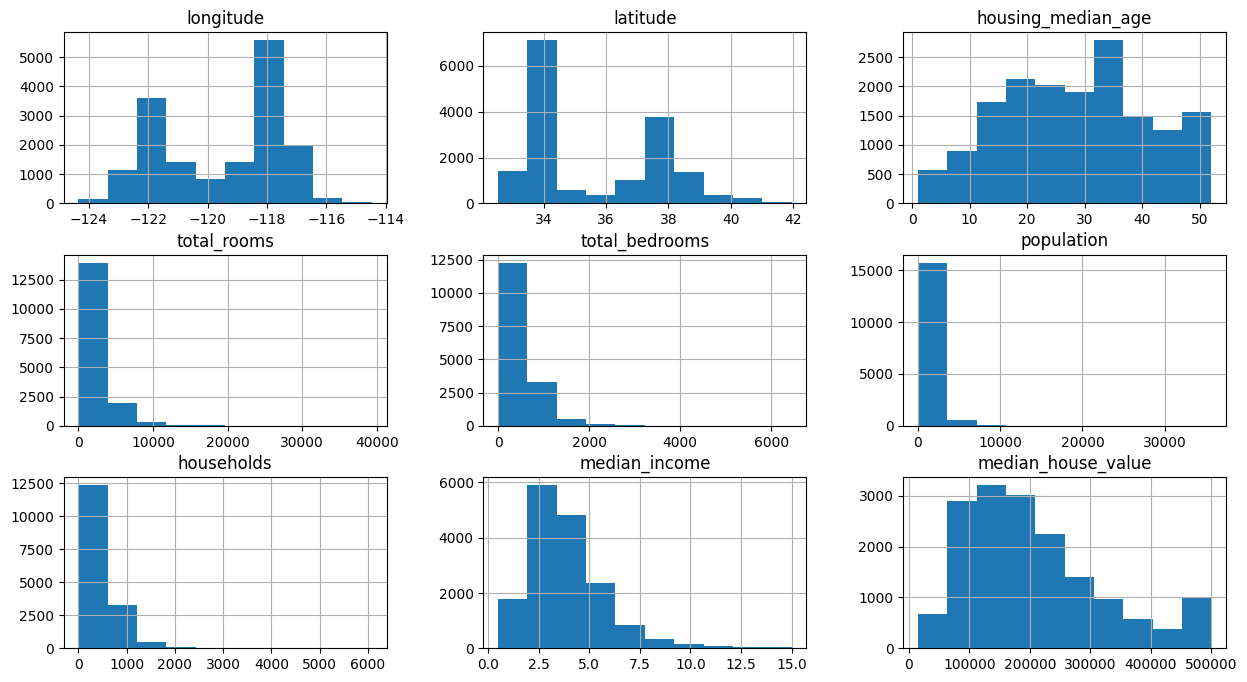

In [11]:
train_data.hist(figsize=(15,8))

<Axes: >

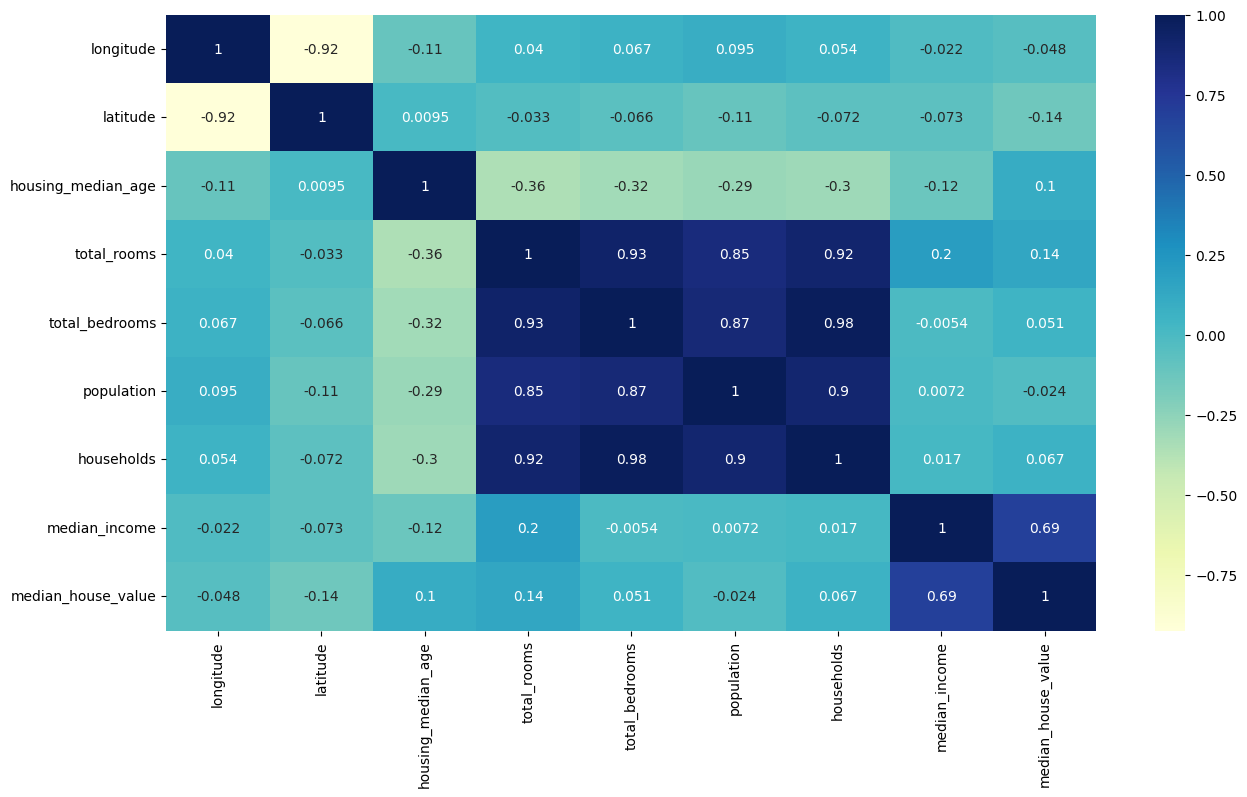

In [12]:
train_data.drop('ocean_proximity', axis=1, inplace=True)

plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


In [13]:
train_data["total_rooms"] = np.log(train_data["total_rooms"]+1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"]+1)
train_data["population"] = np.log(train_data["population"]+1)
train_data["households"] = np.log(train_data["households"]+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

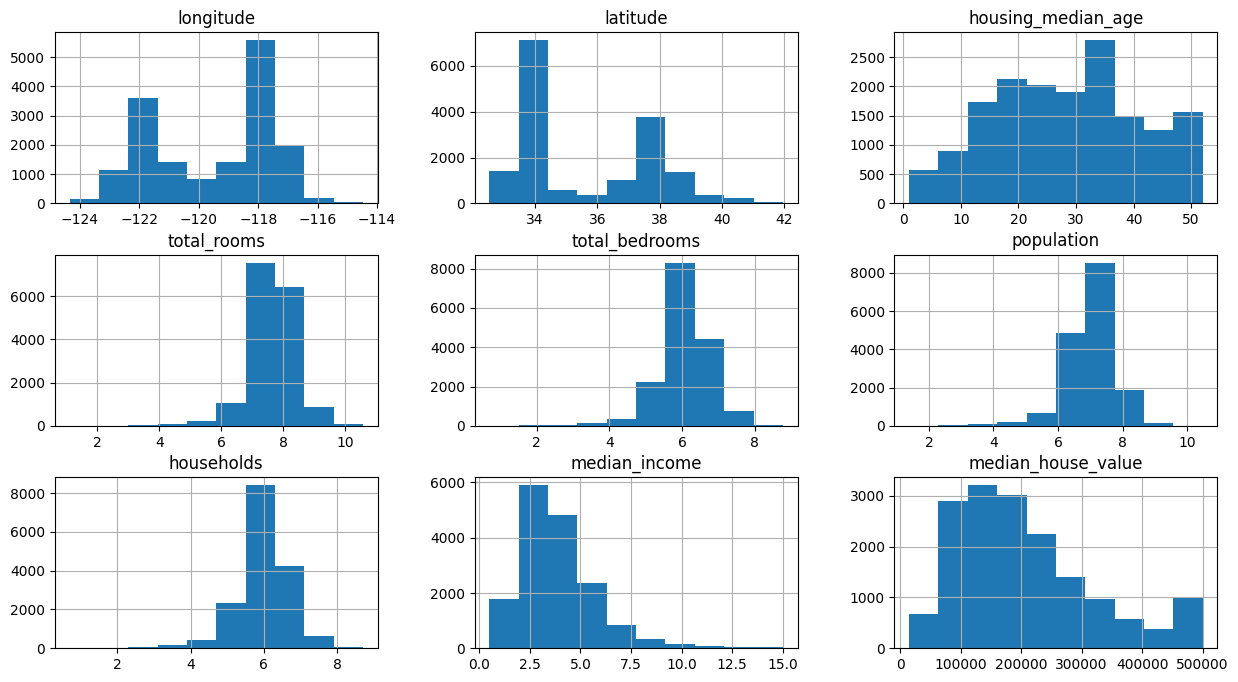

In [14]:
train_data.hist(figsize=(15, 8))


In [15]:
# Re-import the data to include 'ocean_proximity' column
train_data = x_train.join(y_train)

# Count the values in 'ocean_proximity' column
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [16]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,True,False,False,False,False
2057,False,True,False,False,False
6453,False,True,False,False,False
4619,True,False,False,False,False
15266,False,False,False,False,True
...,...,...,...,...,...
11397,True,False,False,False,False
12081,True,False,False,False,False
5447,True,False,False,False,False
866,False,False,False,True,False


In [17]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0,True,False,False,False,False
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0,False,True,False,False,False
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0,False,True,False,False,False
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0,True,False,False,False,False
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0,True,False,False,False,False
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0,True,False,False,False,False
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0,True,False,False,False,False
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0,False,False,False,True,False


In [18]:
train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop('ocean_proximity', axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,True,False,False,False,False
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,False,True,False,False,False
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,False,True,False,False,False
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,True,False,False,False,False
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,273400.0,True,False,False,False,False
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,160800.0,True,False,False,False,False
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,335400.0,True,False,False,False,False
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,231200.0,False,False,False,True,False


In [19]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop('ocean_proximity', axis=1)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,True,False,False,False,False
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,False,True,False,False,False
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,False,True,False,False,False
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,True,False,False,False,False
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,273400.0,True,False,False,False,False
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,160800.0,True,False,False,False,False
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,335400.0,True,False,False,False,False
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,231200.0,False,False,False,True,False


<Axes: >

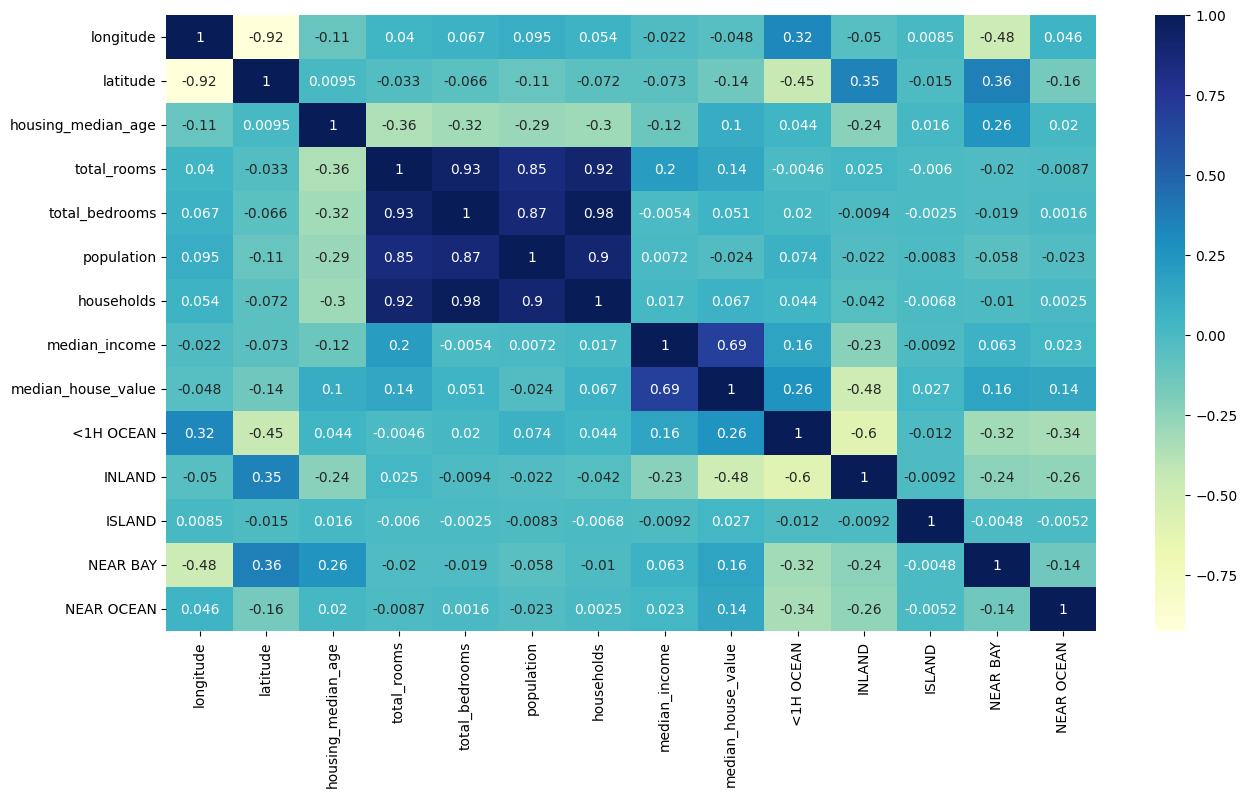

In [21]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

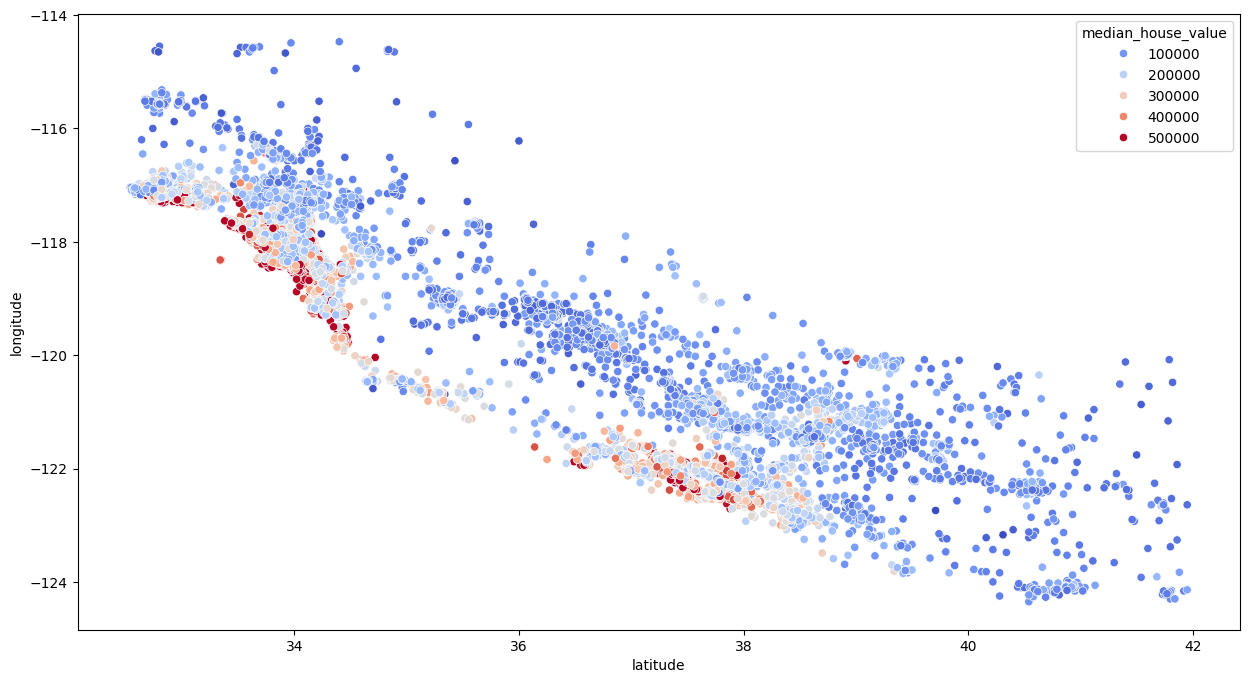

In [22]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue="median_house_value", palette='coolwarm')

In [23]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]
print(train_data.bedroom_ratio)
print(train_data.household_rooms)

17727    0.209429
2057     0.174710
6453     0.217939
4619     0.401778
15266    0.213159
           ...   
11397    0.167168
12081    0.177044
5447     0.231493
866      0.186047
15948    0.204886
Name: bedroom_ratio, Length: 16346, dtype: float64
17727    4.951740
2057     5.954023
6453     5.126482
4619     2.642058
15266    4.551980
           ...   
11397    6.602649
12081    5.840160
5447     4.403315
866      5.410596
15948    5.567233
Name: household_rooms, Length: 16346, dtype: float64


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)


reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [25]:
#Splitting the data again to include the new features

test_data = x_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"]+1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"]+1)
test_data["population"] = np.log(test_data["population"]+1)
test_data["households"] = np.log(test_data["households"]+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop('ocean_proximity', axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]

In [26]:
x_test, y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']

In [27]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14416,-117.24,32.79,20.0,6.869014,5.631212,6.265301,5.541264,3.1838,False,False,False,False,True,0.819799,1.239612
16383,-121.29,38.01,2.0,8.764678,7.018402,8.110127,6.864848,4.4871,False,True,False,False,False,0.800760,1.276748
7731,-118.14,33.92,31.0,8.224700,6.749931,7.746733,6.687109,3.2237,True,False,False,False,False,0.820690,1.229934
1410,-122.07,37.94,30.0,7.139660,5.624018,6.562444,5.402677,2.8920,False,False,False,True,False,0.787715,1.321504
1335,-121.89,37.99,4.0,7.683404,6.393591,6.834109,6.135565,4.1016,False,True,False,False,False,0.832130,1.252273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,7.978311,6.666957,7.076654,6.620073,3.5985,False,False,False,False,True,0.835635,1.205170
6274,-117.95,34.03,33.0,7.486053,5.978886,7.325149,5.932245,3.3389,True,False,False,False,False,0.798670,1.261926
2997,-119.03,35.32,12.0,7.909122,6.309918,7.166266,6.261492,2.5575,False,True,False,False,False,0.797803,1.263137
13440,-117.42,34.08,28.0,7.741099,6.040255,7.180070,6.098074,3.4844,False,True,False,False,False,0.780284,1.269433


In [28]:
x_test_s = scaler.fit_transform(x_test)

In [29]:
reg.score(x_test_s, y_test)

0.6605072986307459

In [30]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [31]:
forest.score(x_test_s, y_test)

0.7157663459635323

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4, 6, 8],
    "max_depth": [None, 4, 8],
}

Grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

Grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
best_forest = Grid_search.best_estimator_

In [42]:
best_forest.score(x_test_s, y_test)

0.7167427840880666